<a href="https://colab.research.google.com/github/donghyundavidchoi/Data_Analysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%95%EC%A0%9C/%EC%A0%95%EA%B7%9C%ED%99%94_min_max_%EB%B0%B1%EB%B6%84%EC%9C%84%EA%B0%92_quantile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주어진 데이터에서 'f5'컬럼을 min-max 스케일 변환한 후, 상위 5%와 하위 5% 값의 합을 구하시오.

In [1]:
!gdown --fuzzy https://drive.google.com/file/d/1txRVXp-Eh222PzIeTQ-fuAoUYFR9f7q-/view?usp=sharing
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Downloading...
From: https://drive.google.com/uc?id=1txRVXp-Eh222PzIeTQ-fuAoUYFR9f7q-
To: /content/kaggle.json
100% 73.0/73.0 [00:00<00:00, 91.7kB/s]


In [2]:
!kaggle datasets download -d agileteam/bigdatacertificationkr

  0% 0.00/15.5k [00:00<?, ?B/s]
100% 15.5k/15.5k [00:00<00:00, 10.5MB/s]


In [3]:
!unzip /content/bigdatacertificationkr.zip

Archive:  /content/bigdatacertificationkr.zip
  inflating: basic1.csv              
  inflating: basic1_json.json        
  inflating: basic1_xml.xml          
  inflating: basic2.csv              
  inflating: basic3.csv              


In [4]:
import pandas as pd
import numpy as np

In [29]:
data = pd.read_csv('/content/basic1.csv')

In [30]:
data

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


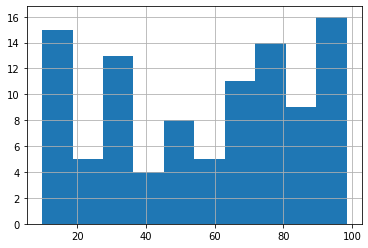

In [31]:
data['f5'].hist()

---------

# f5 데이터에 대해 Min-Max 정규화 수행

In [32]:
data['f5'] = ( data['f5'] - data['f5'].min() ) / ( data['f5'].max() - data['f5'].min() )

In [33]:
data

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,0.919533
1,id02,9.0,서울,70.0,1,NaN,ENFJ,0.570252
2,id03,27.0,서울,61.0,1,NaN,ISTJ,0.084129
3,id04,75.0,서울,NaN,2,NaN,INFP,0.483685
4,id05,24.0,서울,85.0,2,NaN,ISFJ,0.219708
...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,0.483685
96,id97,100.0,경기,NaN,0,NaN,INFP,0.655395
97,id98,39.0,경기,58.0,2,NaN,INFP,1.000000
98,id99,1.0,경기,47.0,0,NaN,ESFJ,0.988166


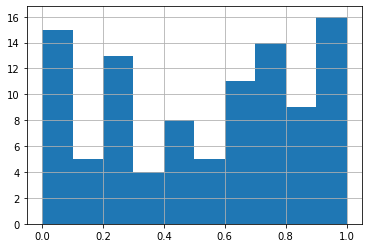

In [34]:
data['f5'].hist()

f5 데이터가 이루어져 0부터 1까지로 정규화가 진행되었음을 확인

--------

# quantile을 사용하여 상위 5%와 하위 5%에 해당하는 백분위값 계산

In [35]:
upper_5 = data['f5'].quantile(q=0.95)
print(upper_5)
lower_5 = data['f5'].quantile(q=0.05)
print(lower_5)

0.9881662742993513
0.03670782406038746


--------

# 상위 5%와 하위 5% 값 더하기

In [36]:
print(upper_5 + lower_5)

1.0248740983597389
